## Prova N2 - Inteligência Artificial

### Nome: JONATHAN CITOLINO

### RA: 082170019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Base de dados :

In [2]:
base = pd.read_excel('titanic_reduced_database_ready.xlsx')

base.head()

C:\Users\Usuario\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,sobrevivente,classe_da_passagem,nome_passageiro,sexo,idade,irmaos_ou_esposa_a_bordo,pais_filhos_a_bordo,valor_passagem,local_de_embarque
0,nao,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S
1,sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,712833.00,C
2,sim,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7925.00,S
3,sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.10,S
4,nao,3,"Allen, Mr. William Henry",male,35.0,0,0,8.05,S


## Conversão de features :

In [3]:
sexo = pd.get_dummies(base['sexo'], drop_first = True)

sobrevivente = pd.get_dummies(base['sobrevivente'], drop_first = True)

base.drop(['nome_passageiro', 'sexo', 'local_de_embarque', 'sobrevivente'], axis = 1, inplace = True)

base = pd.concat([base, sexo, sobrevivente], axis = 1)

base.rename(columns = {'sim': 'sobrevivente', 'male': 'homem'}, inplace = True)

base.head()


,classe_da_passagem,idade,irmaos_ou_esposa_a_bordo,pais_filhos_a_bordo,valor_passagem,homem,sobrevivente
0,3,22.0,1,0,7.25,1,0
1,1,38.0,1,0,712833.00,0,1
2,3,26.0,0,0,7925.00,0,1
3,1,35.0,1,0,53.10,0,1
4,3,35.0,0,0,8.05,1,0


## Classificador:

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y = base['sobrevivente'] 
x = base[['classe_da_passagem', 'idade', 'irmaos_ou_esposa_a_bordo', 'pais_filhos_a_bordo','valor_passagem','homem']] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

modelo = LogisticRegression()
modelo.fit(x_train,y_train)

LogisticRegression()

In [5]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

predictions = modelo.predict(x_test)
print(classification_report(y_test,predictions))

acuracia = accuracy_score(y_test, predictions) * 100
print("A acurácia foi %.2f%%" % acuracia)

              precision    recall  f1-score   support

           0       0.65      0.96      0.77       127
           1       0.79      0.22      0.35        85

    accuracy                           0.67       212
   macro avg       0.72      0.59      0.56       212
weighted avg       0.71      0.67      0.60       212

A acurácia foi 66.51%


In [6]:
##predições para base de teste
predictions


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=uint8)

### EXEMPLO DE COMO SABER SE ALGUEM IRIA SOBREVIVER

In [7]:
classe_da_passagem = 3

idade = 25

irmaos_ou_esposa_a_bordo = 0

pais_filhos_a_bordo = 0

valor_passagem = 712833.00

homem = 1

passageiro = np.array([classe_da_passagem, idade, irmaos_ou_esposa_a_bordo,pais_filhos_a_bordo,valor_passagem,homem]).reshape(1,-1)

predição = modelo.predict(passageiro)

if predição == 1 :
    print("Esse cliente sobreviveu")
else:
    print("Esse cliente não sobreviveu")
    
    
probability = modelo.predict_proba(passageiro)
print("Chance de esse passageiro não sobreviver",probability[0][0]," - Chance de esse passageiro sobreviver",probability[0][1])

Esse cliente sobreviveu
Chance de esse passageiro não sobreviver 0.3429724078835913  - Chance de esse passageiro sobreviver 0.6570275921164087


### se você fosse obrigado a embarcar no Titanic após a análise feita no item anterior quais escolhas você faria?


In [8]:
print(modelo.coef_,np.array(x.columns))
print(modelo.intercept_)

[[-1.71368926e-03 -1.87728909e-02 -2.59707456e-04 -1.38101415e-05
   1.57953055e-06 -8.88116607e-04]] ['classe_da_passagem' 'idade' 'irmaos_ou_esposa_a_bordo'
 'pais_filhos_a_bordo' 'valor_passagem' 'homem']
[-0.00051403]


### Ao análisar os coeficientes dado pelo algoritimo, vemos que para que o algoritimo classifique o passageiro como sobrevivente, o coeficiente "valor_passsagem" esta fazendo com que o algoritimo dente a positivo...

### Se eu fosse obrigado a embarcar no Titanic, eu iria pagar o valor mais caro da passagem, visto que ele esta fazendo com que o valor da classificação suba, aumentando as chances de um individuo sobreviver, como mostrado acima em uma entrada de um passageiro qualquer.

###  3) se por alguma questão ética, a coluna ‘sobrevivente’ não tivesse sido disponibilizada, o você faria para tentar obter essa classificação? Mostre os resultados encontrados



### para tal pergunta, o ideial seria separar os dados em clusters, a fim de obter em qual clusters os passageiros se encontram, e atráves de um dado em específico ja conhecido, ou "chutes" para que consiguimos  descobrir em qual clusters estão os sobreviventes ou não sobreviventes

### Ao usar o Kmeans como modelo, foi feito a Função elbow para determinar o número de cluster necessario, chegando a conclusão de que 3 clusters são ideias, porém, estamos querendo saber se sobreviveu ou se não sobreviveum, por isso foram usandos 2 clusters, usando o algoritimo e seperando, deverá ser feito a análise a fim de determinar quais sobreviveram e morreram, para saber qual clusters estão os sobreviventes e os não sobreviventes.

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
kmeans.inertia_


53477043708782.65

Text(0, 0.5, 'Função Elbow')

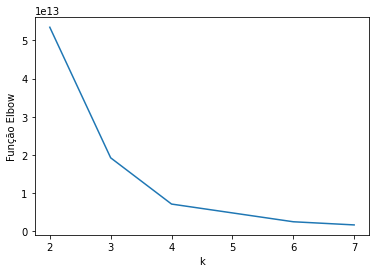

In [10]:

plt.plot([2, 3, 4, 6,7],[53477043708782.65, 19208434145888.85, 7069923154584.097, 2425827888993.6035,1596869743355.3962
])
plt.xlabel('k')
plt.ylabel('Função Elbow')

### se soubessemos um passageiro, poderia ser feito a seguinte análise, mas somente para esse caso.

### sabemos que a linha 2 da base o passageiro sobreviveu, logo após, poderia ser feito a predição do kmens para o mesmo, e descoberto qual clusters ele está presente, podendo supor que os membros daquele clusters provalvelmente sobreviveram.